In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from algo_sample import *
from algo_tom import *
from algo_utils import *
import talib

# show float in two decimal form
plt.style.use('ggplot')
pd.set_option('display.float_format',lambda x : '%.2f' % x)

=== Algorithm Test Tom 2 (with forecast filtered & combination optimization) ===
year
2020.00   51522.00
Name: market_revenue, dtype: float64
Total Revenue: 51522.0


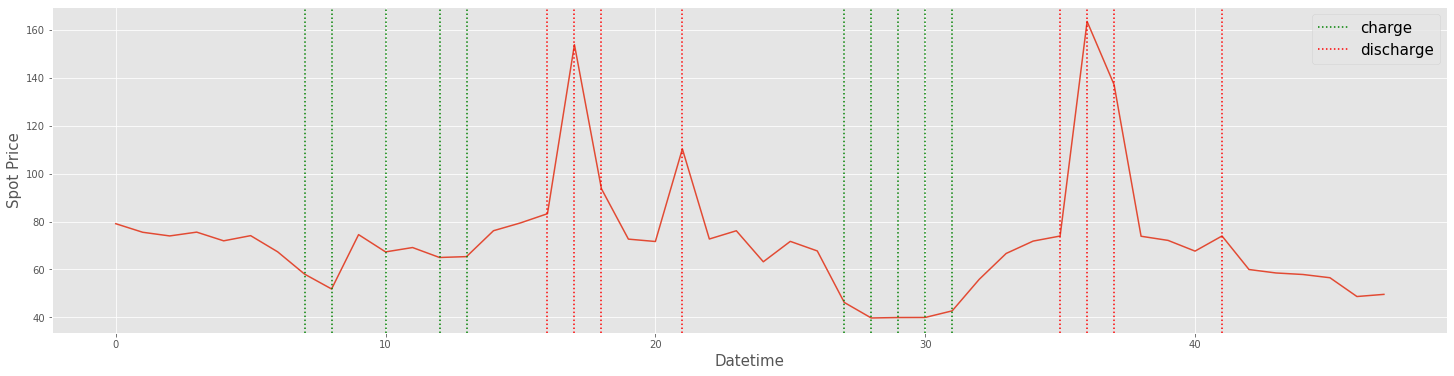

In [4]:
# 2020/07/17 revenue
vic = pd.read_csv("../../data/vic_train.csv")
vic_July = vic[(vic['time'] >= "2020-07-17 00:00:00") & (vic['time'] < "2020-07-18 00:00:00")].reset_index(drop=True)

vic_July['time'] = vic_July['time'].astype('datetime64[ns]')
vic_July['year'] = vic_July['time'].dt.year


# Algo Test Tom 2 (with forecast filtered & combination optimization)
df = vic_July.copy(deep=False)[['spot_price', 'period', 'year']]
df['forecast'] = calc_forecast_tom_2(df.spot_price)
df['forecast'] = filter_forecast(df.spot_price, df.forecast)
df['forecast'] = optimize_combination(df.spot_price, df.forecast)
df = compute_algo(df)
print('=== Algorithm Test Tom 2 (with forecast filtered & combination optimization) ===')
print(df.groupby('year').market_revenue.sum())
print('Total Revenue:', df.market_revenue.sum())
plot_actions(df.spot_price, df.raw_power)
